# Analysis of simulation data
#### this workbook contains tools for analysing cumulative shear strain of  completed simulations or active simulations or both

### Reading gamma
##### from SSD/ cluster

In [1]:
# importing libraries

import os
import matplotlib
import numpy             as     np
import pandas            as     pd
import scipy.optimize    as     opt
import matplotlib.pyplot as     plt
from   fractions         import Fraction
import warnings
import pickle

warnings.filterwarnings('ignore', category=DeprecationWarning, module='mkl')

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

top_dir="/home/rahul/mnt/sshfs_darwin/simulations/"
#top_dir = "/Users/rahul/mnt/sshfs_darwin/simulations/" #mac

NP_vals  = [1000]
#phi_vals = [0.70, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78]
phi_vals = [0.782, 0.785, 0.79]
ar_vals  = [1, 1.4, 2, 4]
numRuns  = 2
maxGamma = 20

def gammaPlots(zeta=0.5, phi_vals = phi_vals, save_plots=False):
    
    if not os.path.exists(top_dir):
        print("Cluster not mounted")
        return
    
    # Data collection
    data = {'NP': [], 'Phi': [], 'ar': [], '#run': [], 'Time': []}
    for NP in NP_vals:
        for phi in phi_vals:
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            for ar in ar_vals:
                for run in range(numRuns):
                    cdir = f"{top_dir}NP_{NP}/phi_{phir}/ar_{ar:.1f}/Vr_{str(zeta)}/run_{run+1}/data_random_seed_params_stress100r_shear.dat"
                    time_val = float('nan')
                    if os.path.exists(cdir):
                        with open(cdir, 'r') as file:
                            time_val = float(file.readlines()[-1].split()[1])
                    data['NP'].append(NP); data['Phi'].append(float(phir))
                    data['ar'].append(ar); data['#run'].append(run + 1); data['Time'].append(time_val)
    df = pd.DataFrame(data)

    # Plotting
    nplots = len(phi_vals)
    nrows  = (nplots + 1) // 2
    ncols  = 2
    fig, ax = plt.subplots(nrows, 2, figsize=( 4*ncols, 4*nrows))
    ax = ax.flatten() if nplots > 1 else [ax]
    
    for i, phi in enumerate(phi_vals):
        subdf = df[(df['NP'] == NP_vals[0]) & (df['Phi'] == phi)]
        for nn in range(numRuns):
            run_df = subdf[subdf['#run'] == nn + 1]
            ax[i].plot(run_df['ar'], run_df['Time'], '*', label=f'run{nn + 1}')

        ax[i].set_title(f'Phi={phi}')
        ax[i].set_xticks(run_df['ar'])
        ax[i].set_ylim([0, maxGamma*1.1])

        lg = ['run' + str(nn+1) for nn in range(numRuns)]
        fig.legend(lg, loc='upper right',bbox_to_anchor=(.95, .7),ncol=1)
        fig.text(0.5, -0.02, 'ar', ha='center', fontsize=14, weight='bold')
        fig.text(-0.02, 0.5, 'gamma', va='center', fontsize=14, weight='bold', rotation='vertical')
        fig.suptitle(f'Zeta={zeta}', fontsize=16, weight='bold')
        plt.tight_layout()
    
    if save_plots:
        plt.savefig(f'NP{NP_vals[0]}_gamma.jpeg', dpi=500, bbox_inches='tight')
    plt.show()

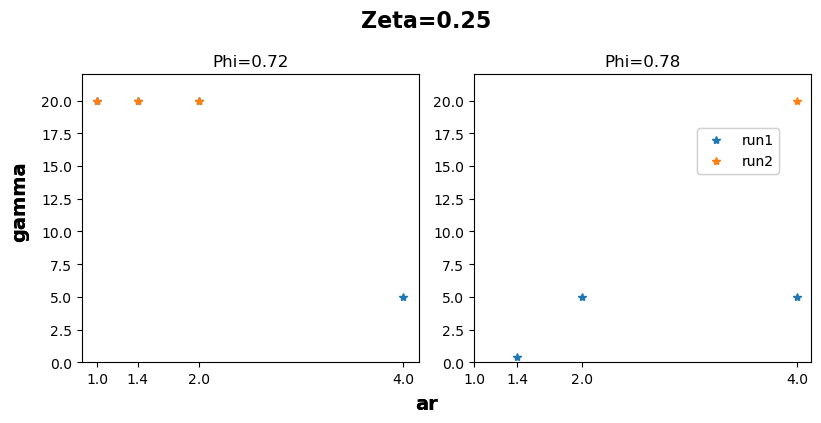

In [4]:
gammaPlots(0.25, [0.72, 0.78])

## Checking if target stain is reached

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

top_dir="/home/rahul/mnt/sshfs_darwin/simulations/"   #linux
#top_dir = "/Users/rahul/mnt/sshfs_darwin/simulations/" #mac

NP  = 1000
#phi_vals = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.80]
#ar_vals  = [1, 1.4, 2.0, 4.0]

phi_vals = [0.78, 0.79, 0.80]
ar_vals  = [2.0, 4.0]

zeta = 0.25
numRuns  = 2
maxGamma = 20
    
if not os.path.exists(top_dir):
    print("Cluster not mounted")
    
for ar in ar_vals:
    for phi in phi_vals:
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        for run in range(numRuns):
            cdir = f"{top_dir}NP_{NP}/phi_{phir}/ar_{ar:.1f}/Vr_{str(zeta)}/run_{run+1}"
            time_val = float('nan')
            if os.path.exists(cdir):
                datFile = cdir + '/data_random_seed_params_stress100r_shear.dat'
                if os.path.exists(datFile):
                    with open(datFile, 'r') as file:
                        time_val = float(file.readlines()[-1].split()[1])
                if time_val != maxGamma:
                    print(f'not completed: Strain - {time_val}. phi_{phir}/ar_{ar:.1f}/Vr_{str(zeta)}/run_{run+1}')

not completed: Strain - 6.64. phi_0.78/ar_2.0/Vr_0.25/run_1
not completed: Strain - nan. phi_0.78/ar_2.0/Vr_0.25/run_2
not completed: Strain - 13.61. phi_0.79/ar_4.0/Vr_0.25/run_2
not completed: Strain - 13.3. phi_0.80/ar_4.0/Vr_0.25/run_1
not completed: Strain - 8.32. phi_0.80/ar_4.0/Vr_0.25/run_2


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

top_dir="/home/rahul/mnt/sshfs_darwin/simulations/"   #linux
#top_dir = "/Users/rahul/mnt/sshfs_darwin/simulations/" #mac

NP  = 1000
phi_vals = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.80]
ar_vals  = [1.4, 2.0, 4.0]


zeta = 0.5
numRuns  = 2
maxGamma = 20
    
if not os.path.exists(top_dir):
    print("Cluster not mounted")
    
for ar in ar_vals:
    for phi in phi_vals:
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        for run in range(numRuns):
            cdir = f"{top_dir}NP_{NP}/phi_{phir}/ar_{ar:.1f}/Vr_{str(zeta)}/run_{run+1}"
            time_val = float('nan')
            if os.path.exists(cdir):
                datFile = cdir + '/data_random_seed_params_stress100r_shear.dat'
                if os.path.exists(datFile):
                    with open(datFile, 'r') as file:
                        time_val = float(file.readlines()[-1].split()[1])
                if time_val != maxGamma:
                    print(f'not completed: Strain - {time_val}. phi_{phir}/ar_{ar:.1f}/Vr_{str(zeta)}/run_{run+1}')

not completed: Strain - 11.61. phi_0.78/ar_2.0/Vr_0.5/run_2
not completed: Strain - 0.25. phi_0.79/ar_2.0/Vr_0.5/run_1
not completed: Strain - 5.0. phi_0.785/ar_4.0/Vr_0.5/run_1
not completed: Strain - 13.66. phi_0.80/ar_4.0/Vr_0.5/run_1
not completed: Strain - 14.93. phi_0.80/ar_4.0/Vr_0.5/run_2


In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

top_dir="/home/rahul/mnt/sshfs_darwin/simulations/"   #linux
#top_dir = "/Users/rahul/mnt/sshfs_darwin/simulations/" #mac

NP  = 1000
phi_vals = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795]
ar_vals  = [1.4, 2.0, 4.0]
zeta = 0.25
numRuns  = 2
maxGamma = 20
    
if not os.path.exists(top_dir):
    print("Cluster not mounted")
    
for ar in ar_vals:
    for phi in phi_vals:
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        for run in range(numRuns):
            cdir = f"{top_dir}NP_{NP}/phi_{phir}/ar_{ar:.1f}/Vr_{str(zeta)}/run_{run+1}"
            time_val = float('nan')
            if os.path.exists(cdir):
                datFile = cdir + '/data_random_seed_params_stress100r_shear.dat'
                if os.path.exists(datFile):
                    with open(datFile, 'r') as file:
                        time_val = float(file.readlines()[-1].split()[1])
                if time_val != maxGamma:
                    print(f'not completed: Strain - {time_val}. phi_{phir}/ar_{ar:.1f}/Vr_{str(zeta)}/run_{run+1}')

Cluster not mounted


In [22]:
# scipt to check if simulation is complete and if rigidity analysis is completed

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#top_dir  = "/home/rahul/mnt/sshfs_darwin/simulations/"   #linux
top_dir = "/Users/rahul/mnt/sshfs_darwin/simulations/"  #mac

NP       = 1000
phi_vals = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, .80]
ar_vals  = [1, 1.4, 2.0, 4.0]
zeta     = 0.75
numRuns  = 2
maxGamma = 20
    
if not os.path.exists(top_dir):
    print("Cluster not mounted")
    
for ar in ar_vals:
    for phi in phi_vals:
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        for run in range(numRuns):
            cdir = f"{top_dir}NP_{NP}/phi_{phir}/ar_{ar:.1f}/Vr_{str(zeta)}/run_{run+1}"
            time_val = float('nan')
            if os.path.exists(cdir):
                datFile = cdir + '/data_random_seed_params_stress100r_shear.dat'
                rifFile = cdir + '/F_rig.txt'
                Frigt   = 'No'
                if os.path.exists(datFile):
                    with open(datFile, 'r') as file:
                        time_val = float(file.readlines()[-1].split()[1])
                if os.path.exists(rifFile):
                    Frigt = 'Yes'
                #if time_val != maxGamma or Frigt == 'No':
                #if time_val == maxGamma and Frigt == 'No':
                if time_val != maxGamma:
                    print(f' phi_{phir}/ar_{ar:.1f}/Vr_{str(zeta)}/run_{run+1} - {time_val} - {Frigt}.')

 phi_0.72/ar_1.0/Vr_0.75/run_1 - 5.0 - Yes.
 phi_0.74/ar_1.0/Vr_0.75/run_1 - 5.0 - Yes.
 phi_0.75/ar_1.0/Vr_0.75/run_1 - 5.0 - Yes.
 phi_0.76/ar_1.0/Vr_0.75/run_1 - 5.0 - Yes.
 phi_0.77/ar_1.0/Vr_0.75/run_1 - 5.0 - Yes.
 phi_0.77/ar_1.4/Vr_0.75/run_1 - 0.61 - No.
 phi_0.78/ar_2.0/Vr_0.75/run_1 - 4.35 - No.
 phi_0.78/ar_2.0/Vr_0.75/run_2 - 2.28 - No.
 phi_0.79/ar_2.0/Vr_0.75/run_1 - 0.27 - No.
 phi_0.785/ar_4.0/Vr_0.75/run_1 - 5.0 - Yes.
 phi_0.79/ar_4.0/Vr_0.75/run_1 - 1.05 - No.
 phi_0.79/ar_4.0/Vr_0.75/run_2 - 4.11 - No.
 phi_0.795/ar_4.0/Vr_0.75/run_1 - 1.69 - No.
 phi_0.795/ar_4.0/Vr_0.75/run_2 - 4.14 - No.


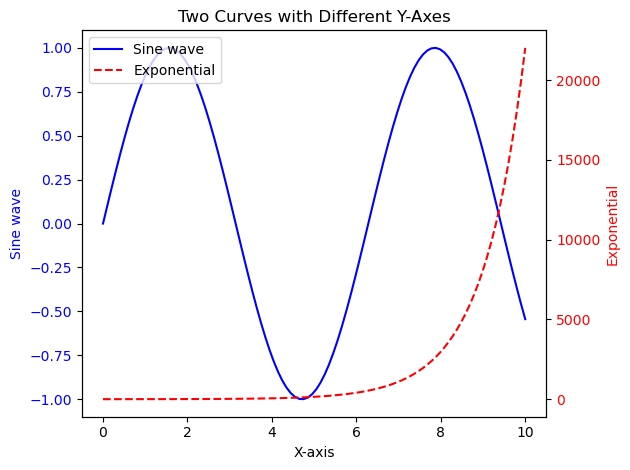

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)  # First curve
y2 = np.exp(x)  # Second curve

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the first curve
line1, = ax1.plot(x, y1, 'b-', label='Sine wave')  # 'b-' is blue solid line
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Sine wave', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a twin y-axis
ax2 = ax1.twinx()

# Plot the second curve
line2, = ax2.plot(x, y2, 'r--', label='Exponential')  # 'r--' is red dashed line
ax2.set_ylabel('Exponential', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Combine legends from both axes
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0, 1))

# Show the plot
plt.title('Two Curves with Different Y-Axes')
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()


### Checking for high viscosity and negative shear rate

In [6]:
# Checking for anomaly in data for cluster simulations

import os
import matplotlib
import numpy             as     np
import pandas            as     pd
import scipy.optimize    as     opt
import matplotlib.pyplot as     plt
from   fractions         import Fraction
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='mkl')

TopDir = "/home/rahul/mnt/sshfs_darwin/simulations/" #(office/home linux cluster)
#TopDir = "/Users/rahul/mnt/sshfs_darwin/simulations/" #mac

print('Cluster not mounted') if not os.path.exists(TopDir) else None

#Parameters
NP   = 1000
phi  = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.80, 0.81, 0.82]
zeta = ['0.25', '0.5', '0.75']
ar   = [1, 1.4, 2.0, 4.0]
numRuns  = 2

# NP  = [1000]
# phi = [0.72, 0.73, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.80]
# #phi = [0.782, 0.785, 0.79]
# ar  = [1, 1.4, 2, 4]
# zeta = ['0.5', '0.25', '0.75']
# numRuns  = 2

s=0
for j in range(len(phi)):
    phir = '{:.3f}'.format(phi[j]) if len(str(phi[j]).split('.')[1])>2 else '{:.2f}'.format(phi[j])
    for k in range(len(ar)):
        for l in range(len(zeta)):
            for m in range (numRuns):
                file_name = f"{TopDir}NP_{NP}/phi_{phir}/ar_{ar[k]:.1f}/Vr_{zeta[l]}/run_{m+1}"
                if os.path.exists(file_name+'/data_random_seed_params_stress100r_shear.dat'):
                #print(file_name+'/data_random_seed_params_stress100r_shear.dat')
                    with open(file_name+'/data_random_seed_params_stress100r_shear.dat','r') as file:
                        dff = pd.read_csv(file, delimiter=' ', header=None,skiprows=37)
                        for idx, item in enumerate(dff.iloc[:, 2]):
                            #print(item)
                            if item<0:
                                #print('/NP_'+str(NP[i])+'/phi_'+phir+'/ar_'+str(ar[k])+'/run_'+str(l+1)+' - negative shear rate')
                                print(f'phi_{phir}/ar_{ar[k]:.1f}/Vr_{zeta[l]}/run_{m+1} - negative shear rate, gamma : {idx/100: .2f}')
                                s+=1
                                break
                        for item in dff.iloc[:,3]:  
                                if item > 1e6:
                                    #print('/NP_'+str(NP[i])+'/phi_'+"{:.2f}".format(phi[j])+'/ar_'+str(ar[k])+'/run_'+str(l+1)+' - high visc')
                                    print(f'phi_{phir}/ar_{ar[k]:.1f}/Vr_{zeta[l]}/run_{m+1} - high visc')
                                    condv=True
                                    s+=1
                                    break
                #else:
                    #print(f'Path does not exist - {file_name}')
if s==0:
    print('\n no anomaly in viscosity or shear rate is found\n')

phi_0.765/ar_1.0/Vr_0.25/run_1 - negative shear rate, gamma :  8.28
phi_0.77/ar_1.0/Vr_0.25/run_1 - negative shear rate, gamma :  8.04
phi_0.77/ar_1.4/Vr_0.25/run_1 - negative shear rate, gamma :  10.20
phi_0.77/ar_2.0/Vr_0.25/run_2 - negative shear rate, gamma :  14.76


In [8]:
# Checking for anomaly in data for cluster simulations # part 2

## MICHEL sharpoint folder

# this code takes the specific folder directly

import os
import matplotlib
import numpy             as     np
import pandas            as     pd
import scipy.optimize    as     opt
import matplotlib.pyplot as     plt
from   fractions         import Fraction
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='mkl')

#TopDir      = "/Users/rahul/sshfs_excelsior/simulations/high_bidispersity" 
#TopDir      = "/home/rahul/sshfsexcelsior/simulations/high_bidispersity/" 
#TopDir      = "/media/Linux_1TB/simulations"
TopDir      = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/Sharepoint_Rahul_MIchel/00_SIMULATIONS_MICHEL/ar_1.4/"
#TopDir      = "/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/Sharepoint_Rahul_MIchel/00_SIMULATIONS_MICHEL/ar_1.4/"

print('Excelsior cluster not mounted') if not os.path.exists(TopDir) else None

#Parameters

NP          = np.array([1000])

phi         = np.array([0.765, 0.766, 0.767, 0.768, 0.769, 0.770])

ar          = np.array([1.4])

run         = {500:8, 1000:4, 2000:2, 4000:1}

s=0

for j in range(len(phi)):
    # redefining phi
    phir = '{:.3f}'.format(phi[j])      
    file_name = TopDir+'phi_'+phir
    #if os.path.exists(file_name):
    with open(file_name+'/data_random_seed_params_stress100r_shear.dat','r') as file:
        #print(file_name+'/data_random_seed_params_stress100r_shear.dat')
        dff = pd.read_csv(file, delimiter=' ', header=None,skiprows=37)
        for item in dff.iloc[:,2]:
            if item<0:
                print('/NP_'+str(NP[i])+'/phi_'+phir+'/ar_'+str(ar[k])+'/run_'+str(l+1)+' - negative shear rate')
                s+=1
                break
        for item in dff.iloc[:,3]:  
            if item > 1e5:
                print('/phi_'+phir+'/run_'+' - high visc')
                condv=True
                s+=1
                break
if s==0:
    print('\n no anomaly in viscosity or shear rate is found\n')


 no anomaly in viscosity or shear rate is found



In [3]:
# Checking for anomaly in data for existing simulations


import os
import matplotlib
import numpy             as     np
import pandas            as     pd
import scipy.optimize    as     opt
import matplotlib.pyplot as     plt
import pickle
from   fractions         import Fraction
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='mkl')

pkldumpdir  ="/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/"

NP          = [1000]

run         = {500:8,1000:4,2000:2,4000:1}

phi         = [0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.792]

ar          = [1.0, 1.4, 1.8, 2.0, 4.0]

data_file = 'data_file_3.pkl'


if os.path.exists(pkldumpdir+data_file):
    with open(pkldumpdir+data_file, 'rb') as file:
        datasets_dict = pickle.load(file)
    #print(f"\nData loaded from existing '{data_file}' pickle file")

s =0
for i in range(len(NP)):
    for j in range(len(phi)):
        # redefining phi
        phir = '{:.3f}'.format(phi[j]) if len(str(phi[j]).split('.')[1])>2 else '{:.2f}'.format(phi[j])
        for k in range(len(ar)):          
            for l in range (run[NP[i]]):
                filename='NP_'+str(NP[i])+'_phi_'+phir+'_ar_'+str(ar[k])
                if filename in datasets_dict:
                    dset = datasets_dict[filename][l][100::,:] #shear rate
                    for item in dset[:,2]: #shear rate
                        if item<0:
                            print('/NP_'+str(NP[i])+'/phi_'+phir+'/ar_'+str(ar[k])+'/run_'+str(l+1)+' - negative shear rate')
                            s+=1
                            break
                            
                    for item in dset[:,3]:  #visc
                        if item > 1e4:
                            #print('/NP_'+str(NP[i])+'/phi_'+"{:.2f}".format(phi[j])+'/ar_'+str(ar[k])+'/run_'+str(l+1)+' - high visc')
                            condv=True
                            s+=1
                            break
if s==0:
    print('\n no anomaly in viscosity or shear rate is found\n')

/NP_1000/phi_0.77/ar_2.0/run_3 - negative shear rate


In [16]:
dset[:,2]

array([0.735693, 0.701518, 0.682952, ..., 0.957934, 0.866303, 0.858332])

### To check if all runs completed till the expected strain unit (γ)

In [6]:
import os
import matplotlib
import numpy             as     np
import pandas            as     pd
import scipy.optimize    as     opt
import matplotlib.pyplot as     plt
from   fractions         import Fraction
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='mkl')

# Dictionary with target gamma vals for each case

tstrain = {
    '4000 0.70': '50', '4000 0.71': '50',
    '4000 0.72': '30', '4000 0.73': '30',
    '4000 0.74': '15', '4000 0.75': '10',
    
    '2000 0.70': '50', '2000 0.71': '50',
    '2000 0.72': '50', '2000 0.73': '50',
    '2000 0.74': '50', '2000 0.75': '15',
    
    '1000 0.70': '50', '1000 0.71': '50',
    '1000 0.72': '50', '1000 0.73': '50',
    '1000 0.74': '35', '1000 0.75': '20',
    "1000 0.755":"20", "1000 0.76": "20",
    "1000 0.77" :"20", "1000 0.78" :"20",
    "1000 0.79": "20",
    "1000 0.792":"15", "1000 0.794":"15",
    "1000 0.796":"15", "1000 0.798":"15",
    
    "1000 0.80":"20", "1000 0.81":"20",
    "1000 0.82":"20", "1000 0.83":"20",
    "1000 0.84":"20", "1000 0.85":"20",
    "1000 0.86":"20", "1000 0.87":"20",
    
    '500 0.70': '50', '500 0.71': '50',
    '500 0.72': '50', '500 0.73': '50',
    '500 0.74': '50', '500 0.75': '30'
}

#TopDir     = "/Users/rahul/sshfs_excelsior/simulations/high_bidispersity" 
TopDir      = "/home/rahul/sshfsexcelsior/simulations/high_bidispersity/" #(office/home linux)
TopDir      ="/media/Linux_1TB/simulations/" #(office linux local)

print('Excelsior cluster not mounted') if not os.path.exists(TopDir) else None
# Parameters
    
run         = {500:8, 1000:4, 2000:2, 4000:1}

NP          = np.array([1000])

phi         = np.array([.77])

ar          = np.array([4.0])

# Initializing count for gamma anomalies
c=s=0

# Parsing all directories
for i in range(len(NP)):
    for j in range(len(phi)):
        # redefining phi
        phir = '{:.3f}'.format(phi[j]) if len(str(phi[j]).split('.')[1])>2 else '{:.2f}'.format(phi[j])
        for k in range(len(ar)):          
            for l in range (run[NP[i]]):
                with open(TopDir+'/NP_'+str(NP[i])+'/phi_'+phir+'/ar_'+str(ar[k])+'/Vr_0.5/run_'+str(l+1)+'/data_random_seed_params_stress100r_shear.dat','r') as file:
                    g_done = float(file.readlines()[-1].strip().split()[1]) # gamma value reached for simulation # getting the 1st element of the last row in .dat file
                    g_target = float(tstrain['{} {}'.format(npl[i], phir)])
                    
                    if g_done < g_target:
                        print(f'incomplete run: NP={npl[i]}, phi={phi[j]}, ar={ar[k]}, #run={runl[l]}, gamma= {g_done}, target = {g_target}')
                        c+=1
                    if g_done > g_target:
                        print(f'over-run: NP={npl[i]}, phi={phi[j]}, ar={ar[k]}, #run={runl[l]}, gamma= {g_done}, target = {g_target}')
                        s+=1
                        
if c==0 and s==0:
    print('\n all runs completed properly')


 all runs completed properly


In [ ]:
data[(data['NP']==1000) & (data['Phi']==0.74) & (data['ar']==1.0) & (data['#run']==1)]['Time'].iloc[0]

In [ ]:
## Checking parameters for ongoing simulations

### Imp params 
0: time

1: strain

2: shear rate

3: visc

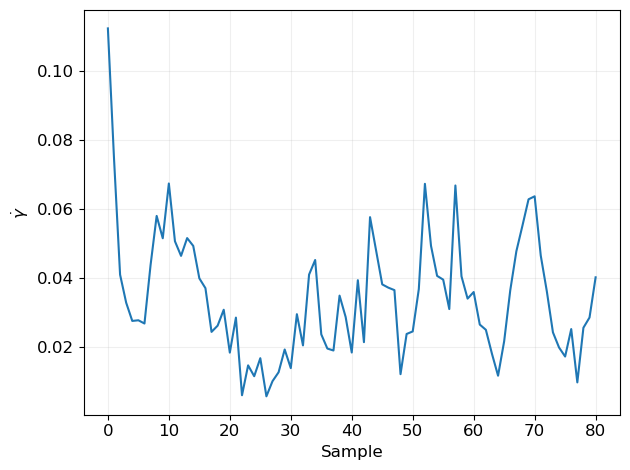

In [5]:
TopDir   = "/media/Linux_1TB/simulations/Test/1_test1/NP_1000/phi_0.77/ar_1.4/Vr_0.5/run_1/"  # office local simulation
#TopDir   = "/media/rahul/Linux_1TB_HDD/New_simulations/NP_1000/phi_0.77/ar_1.4/Vr_0.5/run_1/" # home linux

dat_file = 'data_random_seed_params_stress100r_shear.dat'

fig_save_path = "/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures/test(new_param)/"

with open(TopDir + dat_file, 'r') as file:
    dataset_list = np.loadtxt(file)

plt.plot(dataset_list[18:,2])
plt.ylabel(r'$\dot{\gamma}$', fontsize=12)
#plt.ylabel(r'$\eta$', fontsize=12)
plt.xlabel('Sample', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(which='Both', alpha=0.2)
#plt.title(fr'$\phi={d_phi}, \delta={d_ar}$', fontsize=15)
plt.tight_layout()
figsave = False

if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path +'visc' +'_phi_0.77_del_1.4' + figFormat, bbox_inches="tight",dpi = 500)
plt.show()

In [9]:
mean_diff = lambda vals: sum(vals[i + 1] - vals[i] for i in range(len(vals) - 1)) / (len(vals) - 1) if len(vals) > 1 else 0

In [20]:
# average dt for a particular set
mean_diff(dataset_list[20:,0])

0.38457075

In [13]:
datasets_dict.shape

(93, 30)

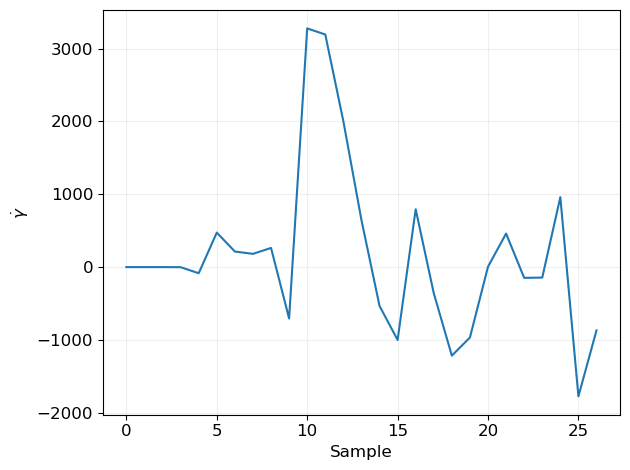

In [4]:
#TopDir   = "/media/Linux_1TB/simulations/Test/1_test1/NP_1000/phi_0.77/ar_1.4/Vr_0.5/run_1/"  # office local simulation
TopDir   = "/media/rahul/Linux_1TB_HDD/New_simulations/NP_1000/phi_0.77/ar_1.4/Vr_0.5/run_1/" # home linux

dat_file = 'data_random_seed_params_stress100r_shear.dat'

#fig_save_path = "/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures/test(new_param)/"
fig_save_path = "/home/rahul/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures/dt/"

with open(TopDir + dat_file, 'r') as file:
    dataset_list = np.loadtxt(file)

plt.plot(dataset_list[:,2])
plt.ylabel(r'$\dot{\gamma}$', fontsize=12)
#plt.ylabel(r'$\eta$', fontsize=12)
plt.xlabel('Sample', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(which='Both', alpha=0.2)
#plt.title(fr'$\phi={d_phi}, \delta={d_ar}$', fontsize=15)
plt.tight_layout()
figsave = True

if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path +'srate' +'_phi_0.77_del_1.4_fixeddt' + figFormat, bbox_inches="tight",dpi = 500)
plt.show()